# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

- Base de Dados: https://drive.google.com/drive/folders/1o2lpxoi9heyQV1hIlsHXWSfDkBPtze-V?usp=sharing

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

In [21]:
#  Criação de graficos
!pip install matplotlib
!pip install seaborn

# Inteligencia artifical
!pip install scikit-learn

#### Importar a Base de dados

In [22]:
import pandas as pd

tabela = pd.read_csv("advertising.csv")
display(tabela)

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

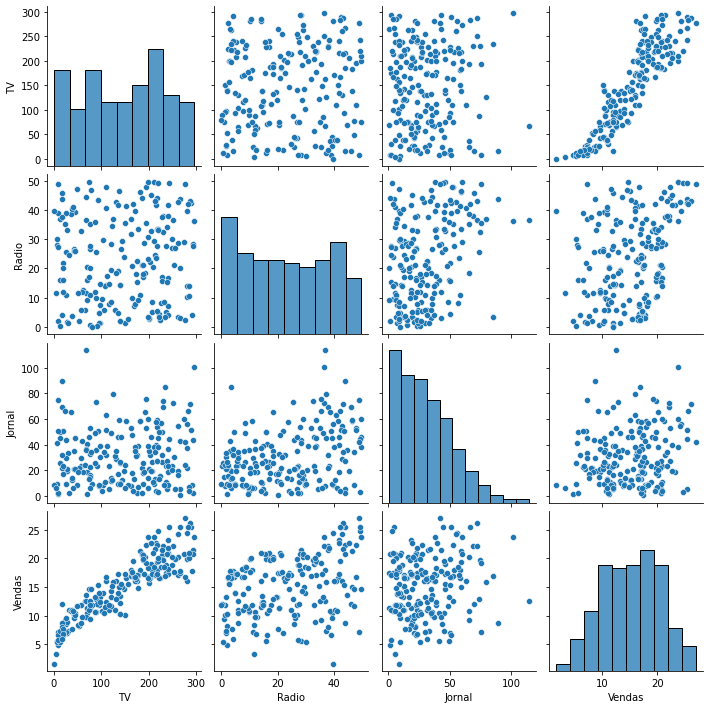

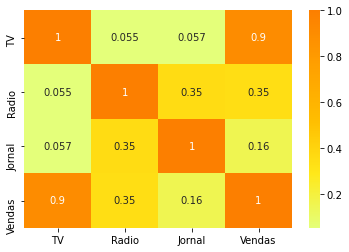

In [23]:
# Descobrir a correlação dentro da tabela por meio de gráfico

# https://seaborn.pydata.org/
import seaborn as sns
import matplotlib.pyplot as plt

# pairplot mostra a correlação das informações de uma tabela
# Criar gráfico
sns.pairplot(tabela)

# Exibir grafico
plt.show()

sns.heatmap(tabela.corr(), cmap="Wistia", annot=True)
    # tabela.corr() Analisar a correlação dos itens,
    # cmap (muda as cores),
    # annot = me retorna os dados
    # Caso de dúvida, consultar a documentação
        
plt.show() 


#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [24]:
# Machine Learning
# treino meu código para poder utilizar ele

# Treinar essa inteligencia
# Separa os dados em X e Y

# Separar os dados em Treino e Teste

# Testar se está de boas

In [25]:
from sklearn.model_selection import train_test_split

# Baseado no meu investimento, eu quero prever quanto é que eu vou vender
# Y quem eu quero calcular
# X Quem eu quero descobrir
y = tabela["Vendas"]
x = tabela[["TV","Radio","Jornal"]]

# Separar os dados em treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y)
    # 70% vai ser utilizado para treino e 30% vai ser utilizado para teste, posso passar esse parâmetro, test_size=0.2
    # O nome das variaveis não é importante, mas essa ordem é
    # A separação da tabela é aleatória, com ,random_state =1 a separação vai ser sempre a mesma
    # Então toda vez que rodar o código, vou ter uma base diferente

#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [26]:
# para criar um inteligencia é preciso, Importar, Criar a inteligencia e treinar

# Importar IA
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Criar a inteligencia
modelo_regressao_linear = LinearRegression()
modelo_arvore_decisao = RandomForestRegressor()

# Treinando a inteligencia
modelo_regressao_linear.fit(x_treino, y_treino)
modelo_arvore_decisao.fit(x_treino, y_treino)

RandomForestRegressor()

#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [27]:
# Teste da AI e Avaliação do Melhor Modelo

from sklearn.metrics import r2_score

# Criar as previsões
previsao_regressao_linear = modelo_regressao_linear.predict(x_teste)
previsao_arvore_decisao = modelo_arvore_decisao.predict(x_teste)

# Comparar as previsões com o gabarito
print(r2_score(y_teste, previsao_regressao_linear))
print(r2_score(y_teste, previsao_arvore_decisao))
# Quando mais proximo de 1, maior é sua precisão comparada com o gabarito

0.9438614743580379
0.9732739072599846


#### Visualização Gráfica das Previsões

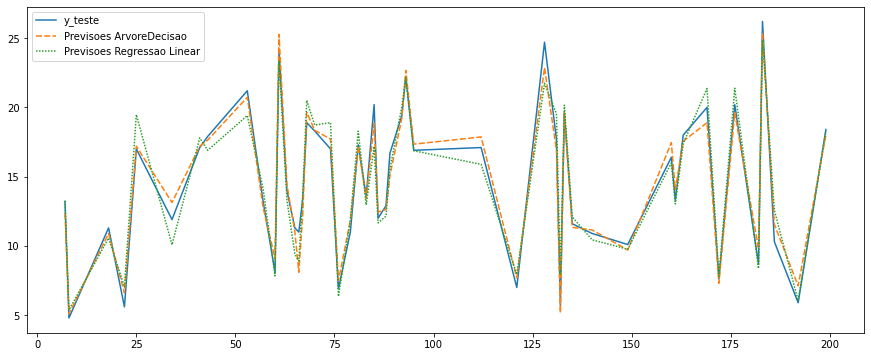

In [28]:
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar["y_teste"] = y_teste
tabela_auxiliar["Previsoes ArvoreDecisao"] = previsao_arvore_decisao
tabela_auxiliar["Previsoes Regressao Linear"] = previsao_regressao_linear

plt.figure(figsize=(15,6))
sns.lineplot(data=tabela_auxiliar)
plt.show()

#### Qual a importância de cada variável para as vendas?

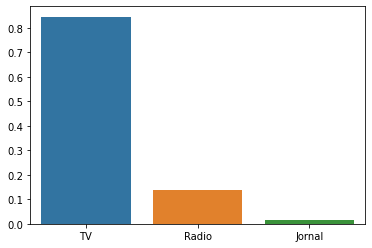

In [29]:
sns.barplot(x=x_treino.columns, y=modelo_arvore_decisao.feature_importances_)
plt.show()

# Caso queira comparar Radio com Jornal
# print(df[["Radio", "Jornal"]].sum())

In [30]:
# O melhor modelo é o de arvore de decisão

# Novas previsões
novos_valores = pd.read_csv("novos.csv")
nova_precisao = modelo_arvore_decisao.predict(novos_valores)
display(nova_precisao)

array([ 7.861,  9.069, 19.739])